In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
#https://www.kaggle.com/moewie94/housepricedata

In [3]:
df = pd.read_csv("housepricedata.csv")
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [4]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [5]:
x = dataset[:,0:10]
y= dataset[:,10]

In [6]:
min_max_scaler = MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [7]:
x_train,x_val_and_test,y_train,y_val_and_test = train_test_split(x_scale,y,test_size=0.2)

In [8]:
x_val,x_test,y_val,y_test = train_test_split(x_val_and_test,y_val_and_test,test_size=0.5)

In [10]:
model = Sequential()
model.add(Dense(units=32,activation='relu',input_dim = 10))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))


In [11]:
model.compile(optimizer='sgd',loss="binary_crossentropy",metrics=['accuracy'])

In [12]:
hist = model.fit(x_train,y_train,batch_size=32,epochs=100,validation_data=(x_val,y_val))

Epoch 1/100
37/37 [==============================] - 0s 6ms/step - loss: 0.6913 - accuracy: 0.5599 - val_loss: 0.6871 - val_accuracy: 0.6096
Epoch 2/100
37/37 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.6490 - val_loss: 0.6820 - val_accuracy: 0.6507
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.6884 - val_loss: 0.6779 - val_accuracy: 0.6781
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.6841 - val_loss: 0.6732 - val_accuracy: 0.7123
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.7235 - val_loss: 0.6679 - val_accuracy: 0.7260
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.7200 - val_loss: 0.6604 - val_accuracy: 0.7397
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7414 - val_loss: 0.6516 - val_accuracy: 0.7123
Epoch 8/100
3

In [13]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.2810 - accuracy: 0.8699


[0.2809700071811676, 0.8698630332946777]

In [16]:
prediction = model.predict(x_test)
prediction = [1 if y>=.87 else 0 for y in prediction]

In [17]:
print(prediction[0:5])
print(y_test[0:5])

[0, 0, 0, 0, 1]
[0 0 1 0 1]


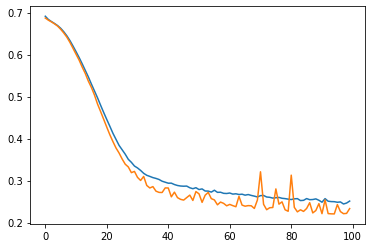

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

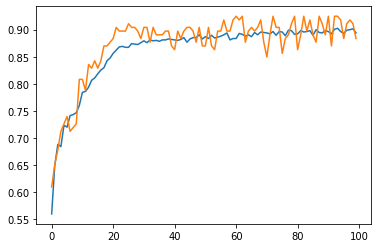

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()